In [1]:
import pandas as pd
import networkx as nx
import numpy as np

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df.rename(columns={'Unnamed: 0': 'ID', 'class': 'label'}, inplace=True)
df.drop(['date'], axis=1, inplace=True)

In [4]:
df.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [5]:
sample = df[0:50]

In [6]:
sample.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [7]:
sample

,ID,news,subject,month,day,year,label
0,0,white house presses congress on bill allowing ...,politics,9,21,2016,1
1,1,china urges cooperation after us brands it a c...,politics,12,19,2017,1
2,2,cleveland school officer placed on leave afte...,politics,1,8,2016,0
3,3,syrian democratic forces say reach deir alzor ...,politics,9,10,2017,1
4,4,senator talks all night as democrats fight tru...,politics,4,5,2017,1
5,5,san francisco just told trump in no uncertain...,politics,12,3,2016,0
6,6,this is clinton’s supreme court plan and it c...,politics,3,28,2016,0
7,7,uk's johnson raises hackles over ww2 'punishme...,politics,1,18,2017,1
8,8,senate blocks democratic plan to expand gun ba...,politics,6,20,2016,1
9,9,mike rowe a lesson on liberty that everyone sh...,politics,7,4,2016,0


In [8]:
#import nltk

In [9]:
#nltk.download('punkt')
#nltk.download('wordnet')

In [10]:
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()

In [11]:
'''
for index,row in sample.iterrows():
    filter_sentence = ''
    
    sentence = row['news']
    
    words = nltk.word_tokenize(sentence)#tokenization
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()#lemmatization
        
    df.loc[index, 'news'] = filter_sentence
'''

"\nfor index,row in sample.iterrows():\n    filter_sentence = ''\n    \n    sentence = row['news']\n    \n    words = nltk.word_tokenize(sentence)#tokenization\n    \n    for word in words:\n        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()#lemmatization\n        \n    df.loc[index, 'news'] = filter_sentence\n"

In [12]:
sample['label'].value_counts()

label
1    28
0    22
Name: count, dtype: int64

In [13]:
graph = nx.Graph()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_features = tfidf_vectorizer.fit_transform(sample['news'])

for idx, row in sample.iterrows():
    feature_tfidf_scores = tfidf_features[idx].toarray()[0]
    
    # Pair feature indices with their TF-IDF scores
    features_with_scores = list(enumerate(feature_tfidf_scores))
    
    # Sort the features based on their TF-IDF scores in descending order
    top_features = sorted(features_with_scores, key=lambda x: x[1], reverse=True)
    
    # Select the top 100 most prominent features
    necessary_features = top_features[:200]

    #necessary_features = np.array(necessary_features).ravel()
    
    node_attrs = {
        'content': necessary_features,
        'month': row['month'],
        'day': row['day'],
        'year': row['year'],
    }
    graph.add_node(row['ID'], label=row['label'], **node_attrs)

In [15]:
'''
for node, attrs in graph.nodes(data=True):
    print(f"Node {node}:")
    for attr_name, attr_value in attrs.items():
        print(f"{attr_name} : {attr_value}")
'''

'\nfor node, attrs in graph.nodes(data=True):\n    print(f"Node {node}:")\n    for attr_name, attr_value in attrs.items():\n        print(f"{attr_name} : {attr_value}")\n'

In [16]:
#print(tfidf_features[0][0,1000])

In [17]:
for node, attrs in graph.nodes(data=True):
    if 'label' not in attrs:
        print(f"Node {node}")# Edges between same and different categories

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
import matplotlib.pyplot as plt

# Edges between same and different categories

In [20]:
total=0
graph.remove_edges_from(list(graph.edges()))
for i in range(len(sample)):
    for j in range(i+1, len(sample)):
        # Access TF-IDF vectors of nodes i and j from the graph
        tfidf_vector_i = graph.nodes[sample.iloc[i]['ID']]['content']
        tfidf_vector_j = graph.nodes[sample.iloc[j]['ID']]['content']

        #tfidf_vector_i = np.atleast_2d(tfidf_vector_i)
        #tfidf_vector_j = np.atleast_2d(tfidf_vector_j)

        tfidf_vector_i_flat = np.array(tfidf_vector_i).ravel()
        tfidf_vector_j_flat = np.array(tfidf_vector_j).ravel()
            
        # Calculate cosine similarity between TF-IDF vectors of nodes i and j
        similarity_score = cosine_similarity([tfidf_vector_i_flat], [tfidf_vector_j_flat])[0][0]

            
        # Define a threshold to create edges only for pairs with similarity above a certain threshold
        threshold = 0.5
        if similarity_score > threshold:
            total=total+1
            # Add an edge between nodes i and j with the similarity score as an edge attribute
            graph.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity_score)
print("Total: ", total)


Total:  760


In [21]:
label_colors = {
    1: 'green',
    0: 'red'
}

# Iterate through nodes and assign colors based on the 'label' attribute
node_colors = []
for node in graph.nodes():
    if 'label' in graph.nodes[node]:
        label = graph.nodes[node]['label']
        color = label_colors.get(label, 'gray')  # Default to gray for unknown labels
        node_colors.append(color)
    else:
        node_colors.append('gray')  # Default to gray for nodes without a 'label' attribute

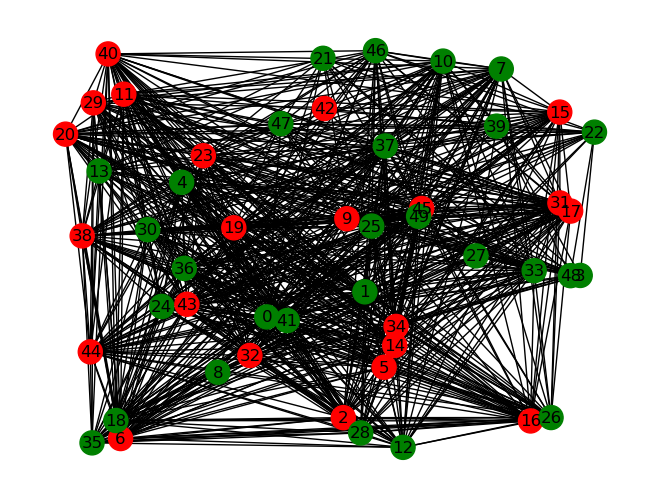

In [22]:
nx.draw_random(graph, with_labels=True, node_color=node_colors)
plt.show()

# Model Building

In [23]:
import torch

from torch_geometric.loader import DataLoader
from torch_geometric.data import Data

In [24]:
# Node features
all_node_features = []
labels_list = []

for node, content in graph.nodes(data=True):
    all_node_features.append(content.get('content'))
    labels_list.append(content.get('label'))

tensor_all_node_features = torch.tensor(all_node_features, dtype=torch.float)
labels = torch.tensor(labels_list, dtype=torch.long)


In [25]:
all_edge_features = []

for u, v, weight in graph.edges(data='weight'):
    #print(f"Edge: {u}-{v}, Weight: {weight}")
    all_edge_features.append(weight)

edge_attr = torch.tensor(all_edge_features, dtype=torch.float)

In [26]:
edges = [(edge[0], edge[1]) for edge in graph.edges]
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

In [29]:
x_new_value = tensor_all_node_features.view(50,-1)

In [30]:
data = Data(x=x_new_value, edge_index=edge_index, edge_attr=edge_attr, y=labels)

In [31]:
# Accessing node features
print("Node features:")
print(data.x.shape)
print(data.x)

# Accessing edge indices
print("\nEdge indices:")
print(data.edge_index.shape)
print(data.edge_index)

# Accessing edge features (if available)
if data.edge_attr is not None:
    print("\nEdge features:")
    print(data.edge_attr.shape)
    print(data.edge_attr)

# Accessing node labels
if data.y is not None:
    print("\nNode labels:")
    print(data.y.shape)
    print(data.y)


Node features:
torch.Size([50, 400])
tensor([[4.3530e+03, 3.2049e-01, 1.3980e+03,  ..., 0.0000e+00, 8.7000e+01,
         0.0000e+00],
        [8.1600e+02, 7.2534e-01, 1.8230e+03,  ..., 0.0000e+00, 3.0000e+00,
         0.0000e+00],
        [8.3100e+02, 3.5156e-01, 8.6500e+02,  ..., 0.0000e+00, 2.9000e+01,
         0.0000e+00],
        ...,
        [2.8190e+03, 3.5473e-01, 2.4830e+03,  ..., 0.0000e+00, 1.3700e+02,
         0.0000e+00],
        [9.2400e+02, 2.9510e-01, 3.1900e+02,  ..., 0.0000e+00, 1.5300e+02,
         0.0000e+00],
        [1.1840e+03, 3.4957e-01, 4.4000e+02,  ..., 0.0000e+00, 1.1400e+02,
         0.0000e+00]])

Edge indices:
torch.Size([2, 760])
tensor([[ 0,  0,  0,  ..., 47, 47, 48],
        [ 1,  2,  3,  ..., 48, 49, 49]])

Edge features:
torch.Size([760])
tensor([0.5649, 0.5792, 0.5029, 0.5159, 0.5337, 0.6540, 0.6019, 0.6122, 0.7296,
        0.5937, 0.5437, 0.5900, 0.5620, 0.6517, 0.5720, 0.8075, 0.7187, 0.5572,
        0.5333, 0.7275, 0.5015, 0.7143, 0.6050, 0.5289, 

In [32]:
from torch_geometric.nn import global_max_pool as gmp
from torch_geometric.nn import GATConv
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [33]:
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the model
num_node_features = data.x.shape[1]
num_classes = len(torch.unique(labels))
model = GCN(num_node_features, num_classes)
print(model)

GCN(
  (conv1): GCNConv(400, 16)
  (conv2): GCNConv(16, 2)
)


In [34]:
from sklearn.model_selection import train_test_split

train_indices, val_indices = train_test_split(range(len(labels)), test_size=0.2, stratify=labels)

# Reindex the edges to ensure they refer to the correct subset of nodes
def reindex_edges(edge_index, indices):
    index_map = {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}
    new_edge_index = edge_index.clone()
    for i in range(edge_index.size(1)):
        new_edge_index[0, i] = index_map.get(edge_index[0, i].item(), -1)
        new_edge_index[1, i] = index_map.get(edge_index[1, i].item(), -1)
    valid_edges = (new_edge_index[0] != -1) & (new_edge_index[1] != -1)
    return new_edge_index[:, valid_edges]

# Create Data objects for train and validation sets
train_edge_index = reindex_edges(edge_index, train_indices)
val_edge_index = reindex_edges(edge_index, val_indices)

train_data = Data(x=data.x[train_indices], edge_index=train_edge_index, edge_attr=edge_attr, y=labels[train_indices])
val_data = Data(x=data.x[val_indices], edge_index=val_edge_index, edge_attr=edge_attr, y=labels[val_indices])

In [35]:
train_loader = DataLoader([train_data], batch_size=1, shuffle=True)
val_loader = DataLoader([val_data], batch_size=1, shuffle=False)

In [36]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = F.nll_loss(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

In [37]:
def validate():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Ensure no gradients are being calculated to save memory and computations
        for batch in val_loader:
            out = model(batch)
            pred = out.argmax(dim=1)
            correct += int((pred == batch.y).sum())
            total += batch.y.size(0)  # Count the total number of samples
    return correct / total  # Divide by the total number of samples

In [38]:
for epoch in range(200):  # Adjust the number of epochs as needed
    train_loss = train()
    val_accuracy = validate()
    print(f'Epoch {epoch+1}, Loss: {train_loss:.9f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch 1, Loss: 5274.497070312, Validation Accuracy: 0.6000
Epoch 2, Loss: 4864.538574219, Validation Accuracy: 0.6000
Epoch 3, Loss: 3521.295410156, Validation Accuracy: 0.6000
Epoch 4, Loss: 1885.249023438, Validation Accuracy: 0.6000
Epoch 5, Loss: 522.412536621, Validation Accuracy: 0.6000
Epoch 6, Loss: 0.835309625, Validation Accuracy: 0.6000
Epoch 7, Loss: 0.694073677, Validation Accuracy: 0.6000
Epoch 8, Loss: 0.694537818, Validation Accuracy: 0.4000
Epoch 9, Loss: 0.694930017, Validation Accuracy: 0.4000
Epoch 10, Loss: 38.359523773, Validation Accuracy: 0.4000
Epoch 11, Loss: 0.798801661, Validation Accuracy: 0.6000
Epoch 12, Loss: 0.701170802, Validation Accuracy: 0.4000
Epoch 13, Loss: 0.695123553, Validation Accuracy: 0.4000
Epoch 14, Loss: 0.695021987, Validation Accuracy: 0.4000
Epoch 15, Loss: 0.694903076, Validation Accuracy: 0.4000
Epoch 16, Loss: 0.694769084, Validation Accuracy: 0.4000
Epoch 17, Loss: 0.694621921, Validation Accuracy: 0.4000
Epoch 18, Loss: 0.6944633